In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns 
from matplotlib.cbook import boxplot_stats  

In [3]:
cwd = os.getcwd()

dataset = pd.read_csv(cwd + "\\work.csv", sep=",")
submission = pd.read_csv(cwd + "\\submission.csv", sep=",")

len(dataset)

1460

In [4]:
pd.set_option('display.max_columns', 500)

## Split Train/Test

In [5]:
exp = list(dataset.columns.values)
exp.remove('SalePrice')
X = dataset[exp]
y = dataset['SalePrice']

X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=0.3 , 
                            random_state= 100 )

# Outliers study

LotFrontage : nan - nan
[]


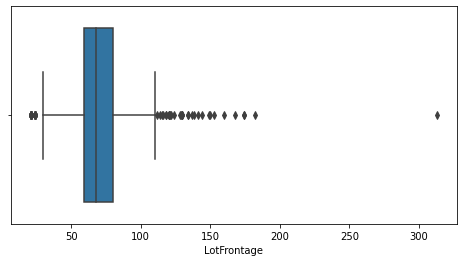

LotArea : 1477 - 17542
[ 25286  26142  53107  36500  21872  17755  21384  22420  20781  25419
  31770 164660  21750  20896  24682  19378  21286  25000  39104  25339
  63887  20431  23257  32463  17871  18450  28698  18890  19296  18030
  53227  40094  21780  21453  20544  21930  17920  29959 115149  35760
  23595  18386  21000  21535 215245  18800  70761  50271]


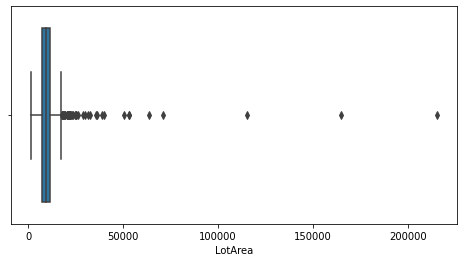

YearBuilt : 1885 - 2010
[1872 1880 1880]


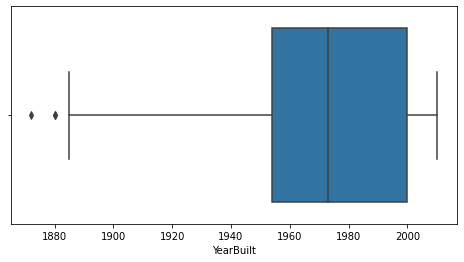

YearRemodAdd : 1950 - 2010
[]


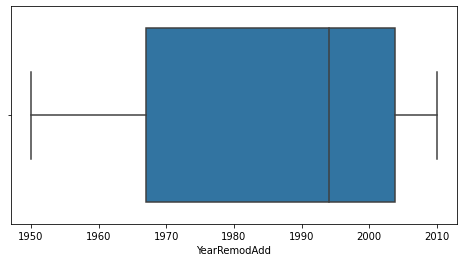

MasVnrArea : nan - nan
[]


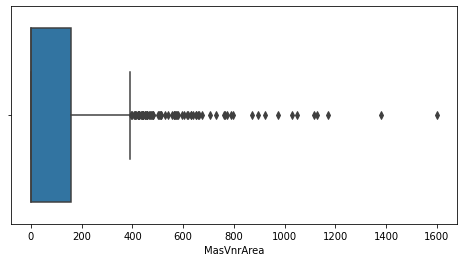

BsmtFinSF1 : 0 - 1767
[2096 5644 2260 1880 1810]


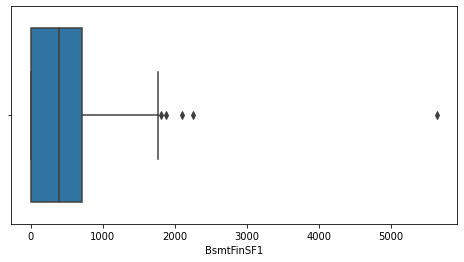

BsmtFinSF2 : 0 - 0
[ 391  150  279  128  480  276  336  210  106  546  377  539  441  420
  972   68  551  551  219  362  168  239  712  580  184  180  147  352
  630  228  174  531 1057  768  661  612  547  375  692 1080 1063  391
  311 1474  290  108  712  411  193  173  180  294  492   93  435  139
   64  841  600  723 1029  764  324  211  690  645  469  486  105   32
  634  258  110  165   28 1031  479  906  117   41  147 1085  380  499
 1120  468  344  438   64  495  180  606  345   80   96  396   81  132
  290  240  869   96  872  472  820  287  465  182  682  713  287  400
  791  620  215  480  354  177   41]


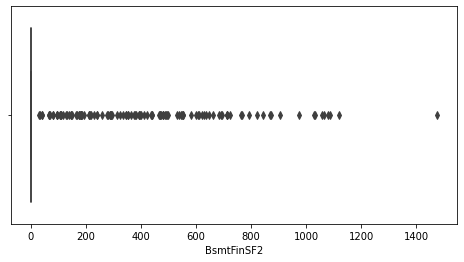

BsmtUnfSF : 0 - 1689
[1753 1694 2121 2042 2336 1800 1969 1768 2046 2002 1710 2153 1836 1734
 1774 1869]


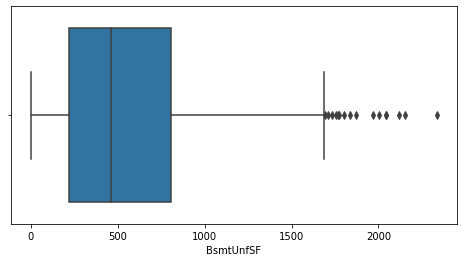

TotalBsmtSF : 105 - 2077
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 3094 2110 2136 2633 2396 6110 2121 2392 3200 2109 3138 3206 2223
 2444 2136 2153 2158]


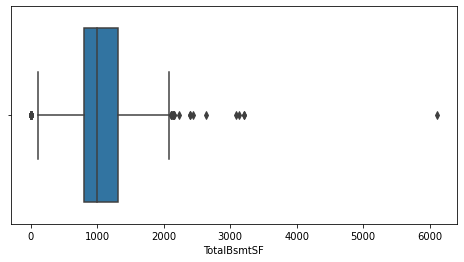

1stFlrSF : 372 - 2223
[2402 2633 2411 4692 2392 3228 3138 2259 2444 2898]


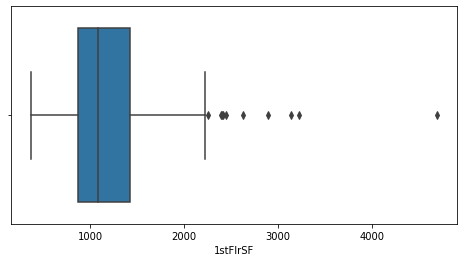

2ndFlrSF : 0 - 1818
[2065 1872]


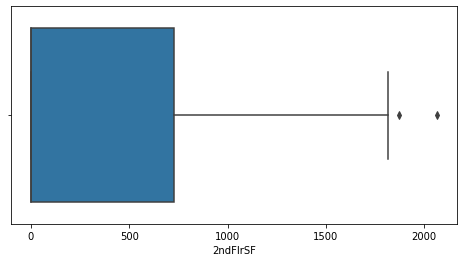

GrLivArea : 438 - 2728
[3194 2794 3112 3238 2730 4476 2810 2775 5642 3228 2872 2945 3395 3086
 2872 4676 3447 3627 3493 2978 4316 2822 2898]


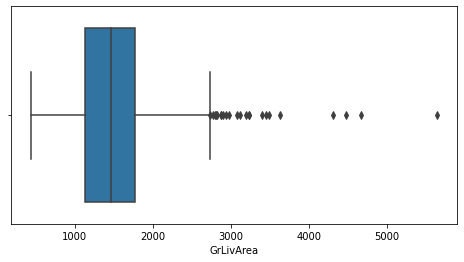

GarageYrBlt : nan - nan
[]


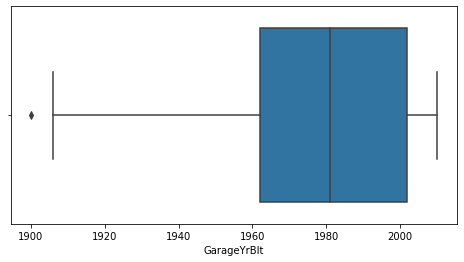

GarageArea : 0 - 936
[ 954  968 1043 1134 1418 1390  968 1356 1069 1014 1052 1020 1025]


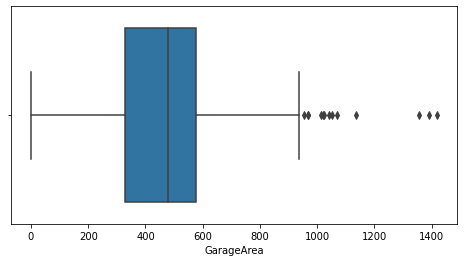

WoodDeckSF : 0 - 418
[670 519 476 736 468 500 431 439 421 486 550 448 509 536 495 436 426 668
 635 441 857]


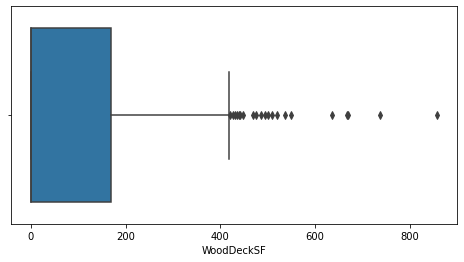

OpenPorchSF : 0 - 175
[285 188 231 288 198 185 312 262 199 304 234 291 319 187 267 176 210 180
 207 184 189 502 214 292 240 240 229 241 192 265 184 282 406 250 192 204
 200 192 213 341 418 205 195 204 211 238 234 244 224 243 523]


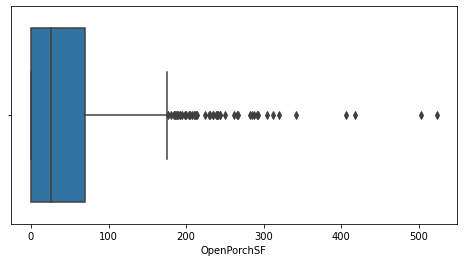

EnclosedPorch : 0 - 0
[ 96 144 114 112 218  40 156 190  84 210 158 244 150 128 221  36 144 170
 248 236 140 240 192 228  77 150 184 134 112  42  39 202 552 194  32 168
 176 130 128  40  39 126  60 137 205 280  96 108 129 112 112 236  68 208
 100 162 148 112 214 264  80 294 154 115 136  20 386  34 272 192 120 291
  96 240  56 116  37  70 160 254 112 145 252 216 120  96 198 196 228 120
  52 224 234 116 176 216  32 158 120 154 216  77 330 185 205 216 112 112
 286  96 143 112 252 180 112 150 164 189  90 100 164  80 144 192 184 239
  48 202  81 102 112  91 220 226 169 275  99 160 184 234 115 177 174 192
 112 105 212  64 301 112 138 128]


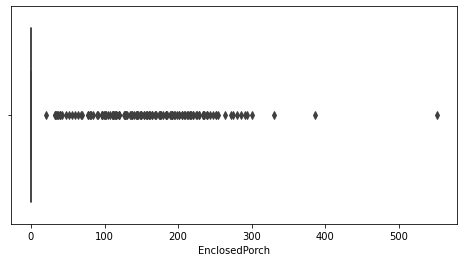

ScreenPorch : 0 - 0
[ 40 189 156 259 224 189 100 170 234 224 198 374 116 126 168 192 291 197
 155 147 216 168 142 216 185 190 222 271 142 154  63  90 163 204 184 225
 189 100 147 168 198 192 276 170 144 224 224 182 153 180 126 312 160 140
 252  80 200 200 152 176  99 180 160 130 273 144 122 265 192 128 165 266
 126 192 178 260 233 180 120]


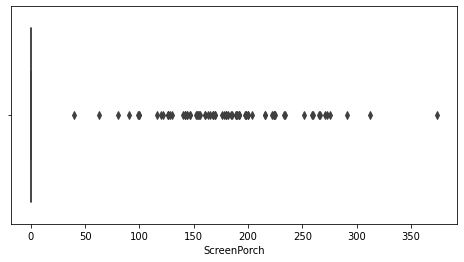

In [6]:
varListe = ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch']

#Boite à moustache
for var in varListe :
    plt.figure(figsize=(8,4))
    sns.boxplot(x=var,data=X_train)
    stats=boxplot_stats(X_train[var])
    print(var + ' : ' + str(stats[0]['whislo']) + ' - ' + str(stats[0]['whishi']))
    print(stats[0]['fliers'])
    plt.show()

# Modality regroupment in categorical features

In [7]:
categorical_features = [
    'HeatingQC',
    'CentralAir',
    'Electrical',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'KitchenQual',
    'TotRmsAbvGrd',
    'Functional',
    'Fireplaces',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageCars',
    'GarageQual',
    'GarageCond',
    'PavedDrive',
    'Fence',
    #'MiscFeature',
    'MoSold',
    'YrSold',
    'SaleType',
    'SaleCondition',
    'MSSubClass',
    'RoofStyle',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'ExterQual',
    'ExterCond',
    'Foundation',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'MSZoning',
    'Alley',
    'LotShape',
    'LandContour',
    'LotConfig',
    'LandSlope',
    'Condition1',
    'BldgType',
    'HouseStyle',
    'OverallQual',
    'Neighborhood',    
    'OverallCond']

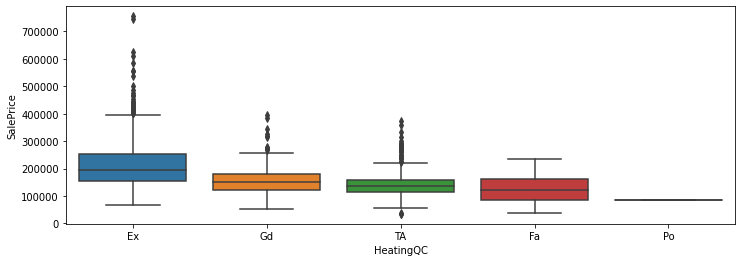

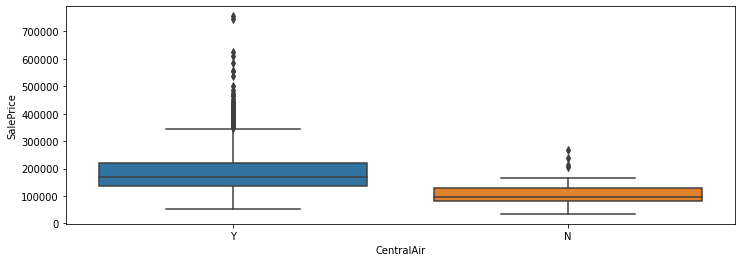

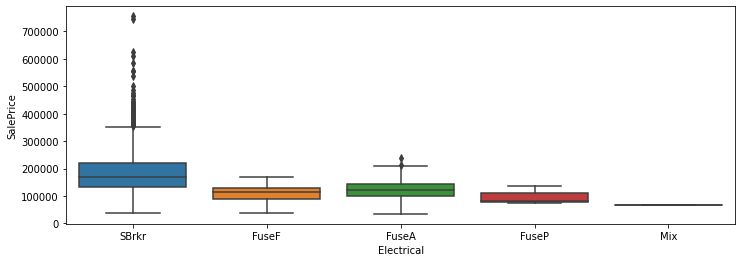

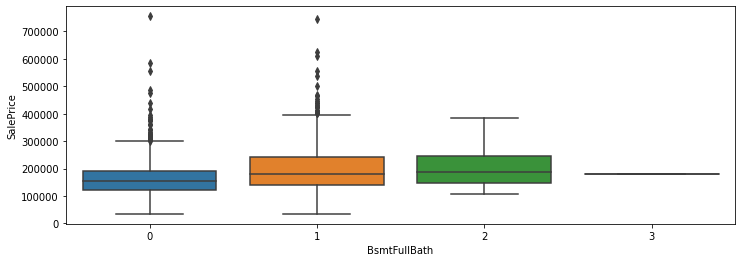

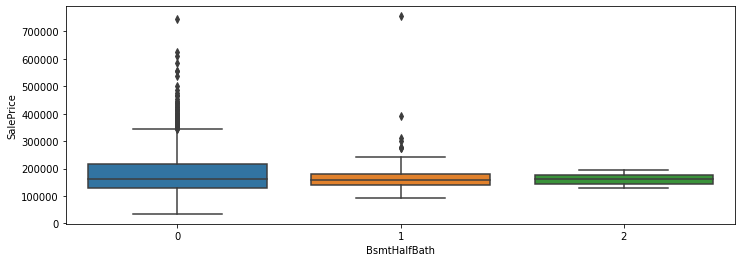

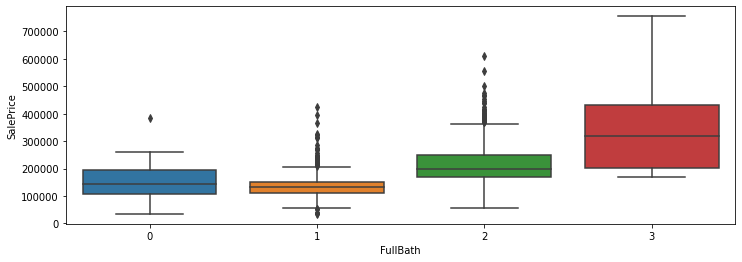

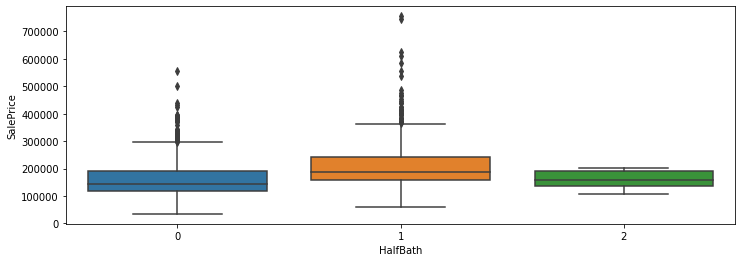

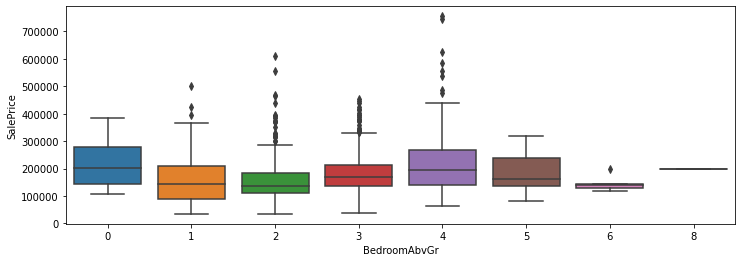

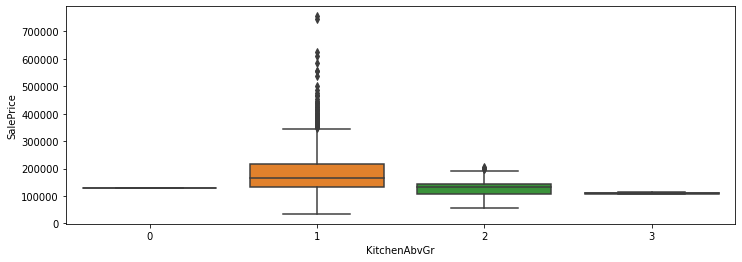

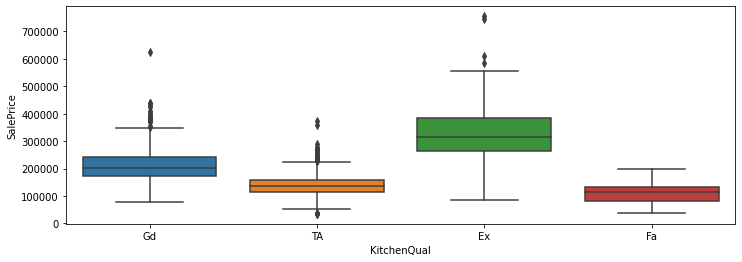

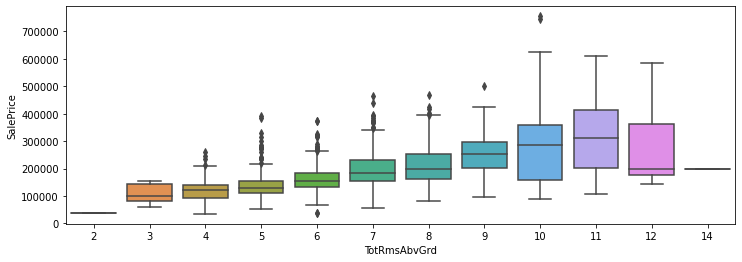

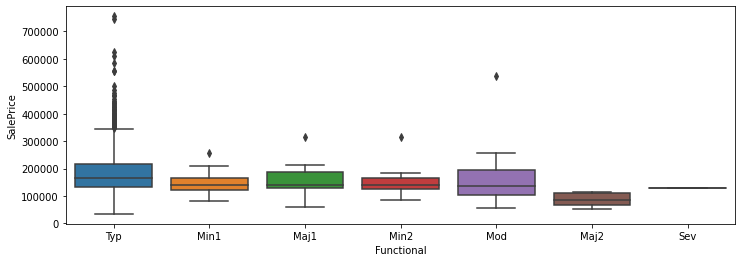

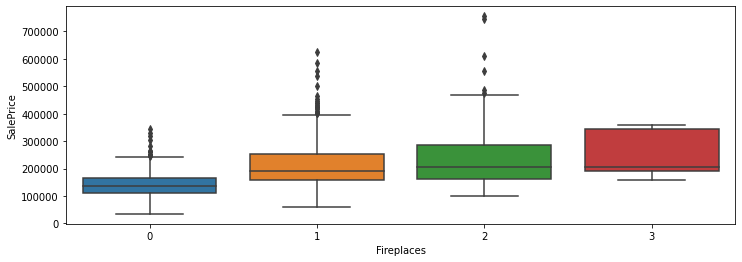

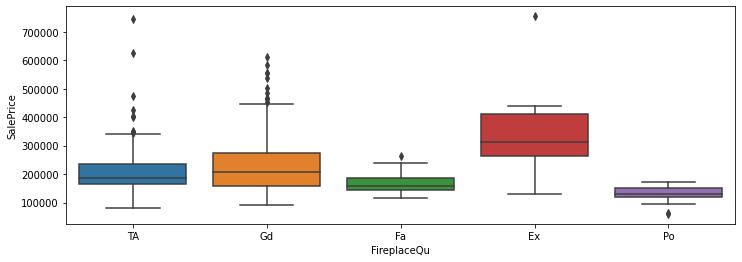

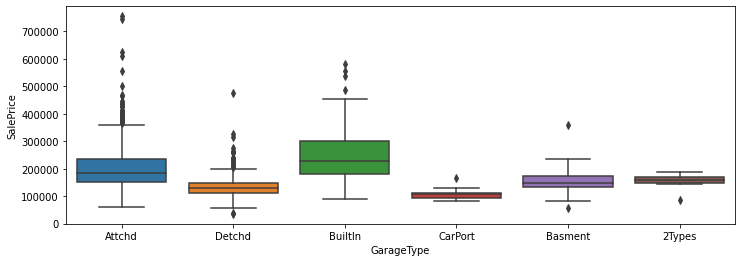

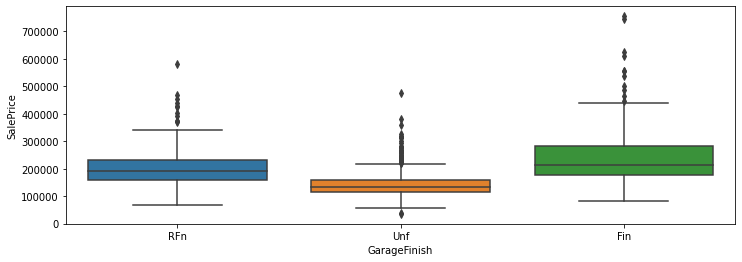

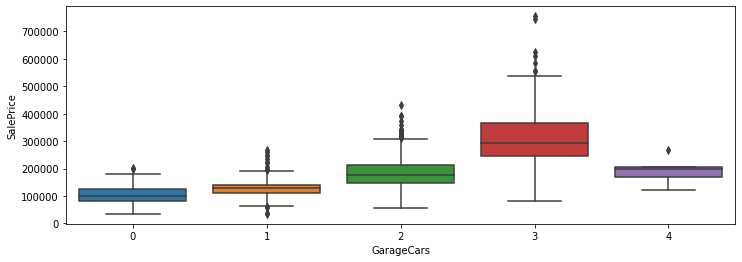

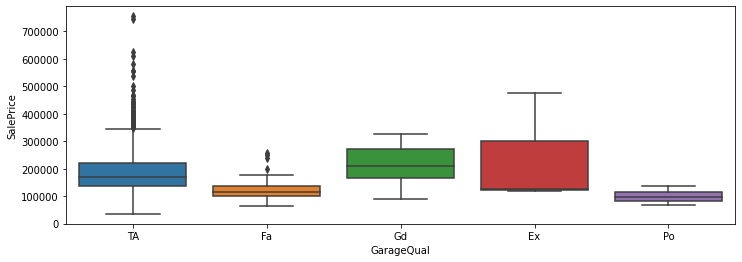

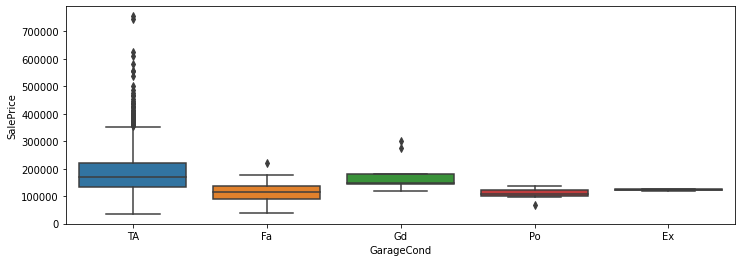

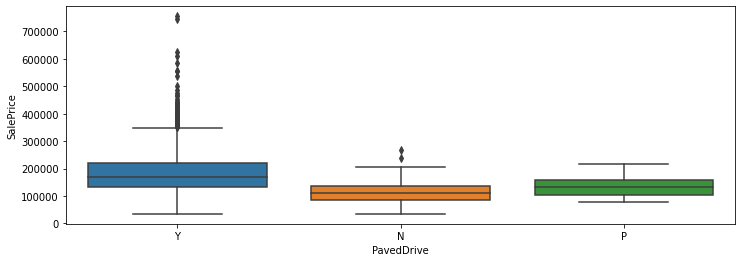

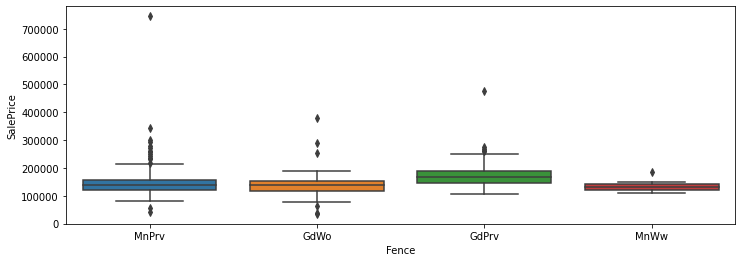

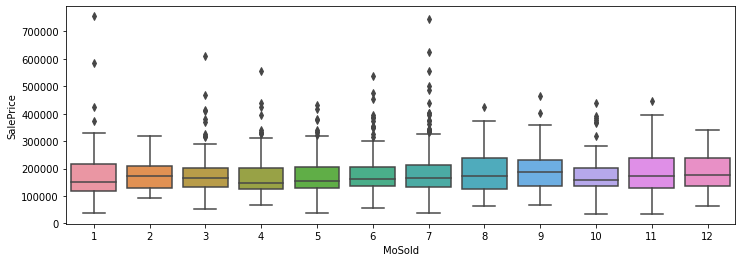

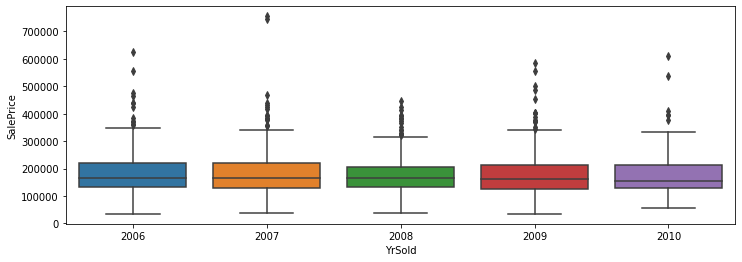

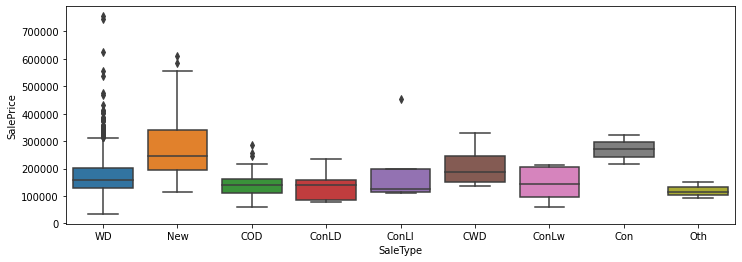

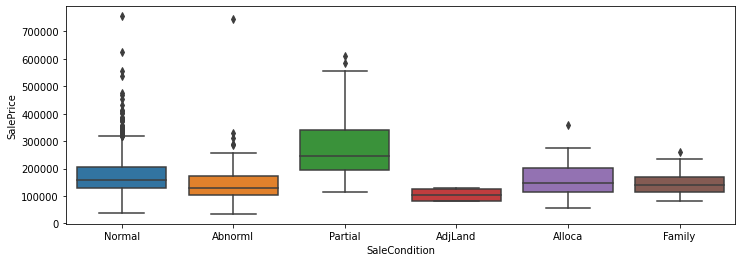

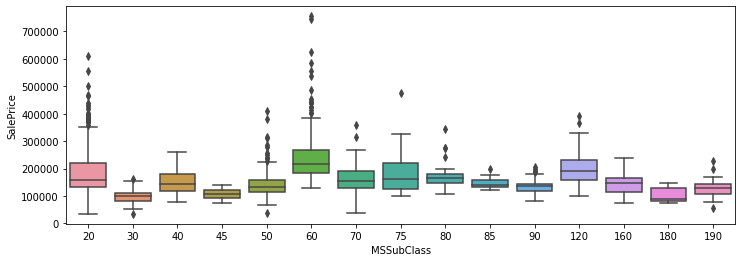

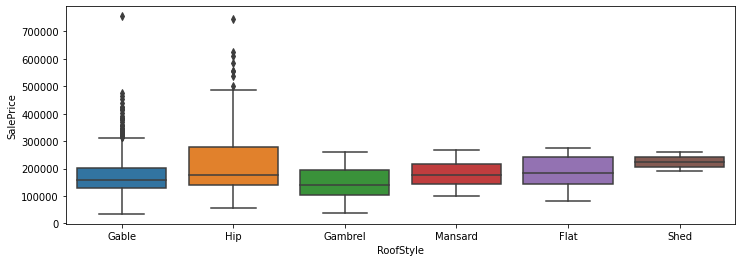

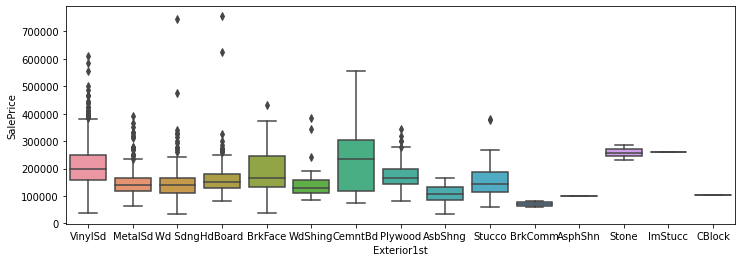

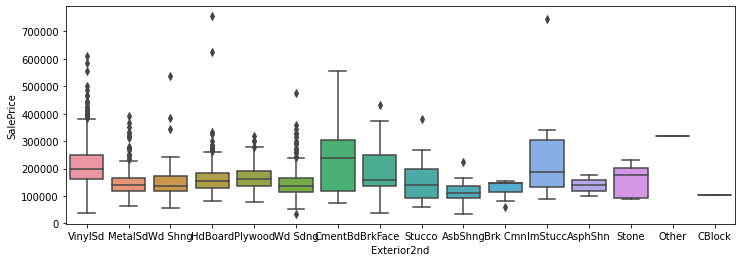

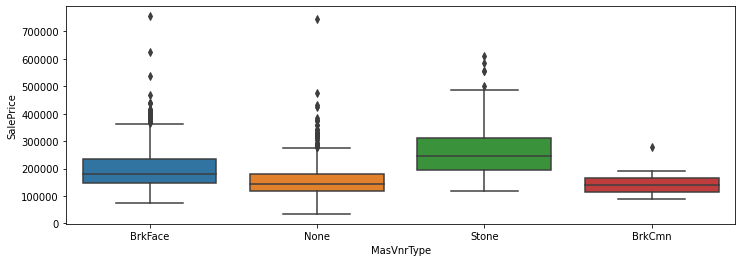

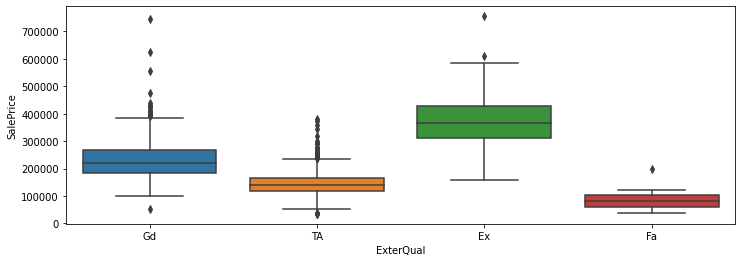

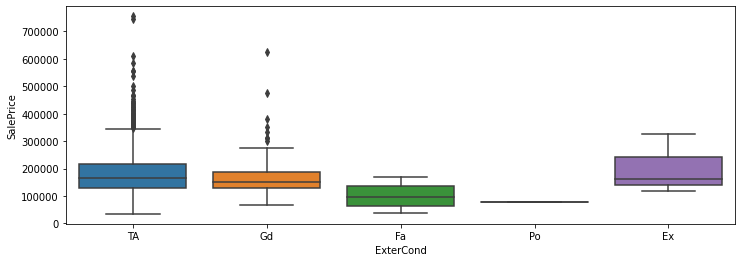

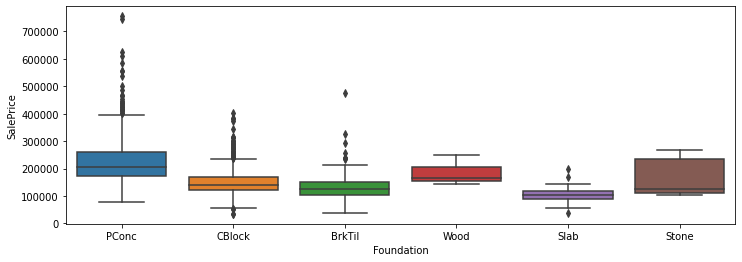

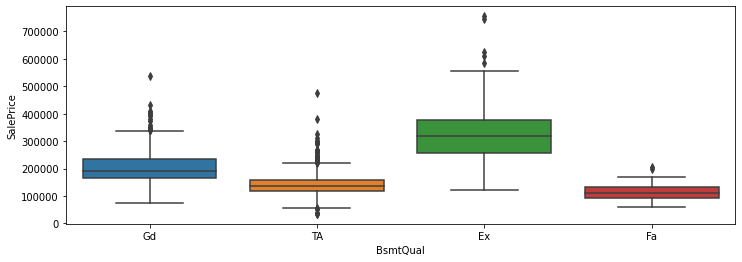

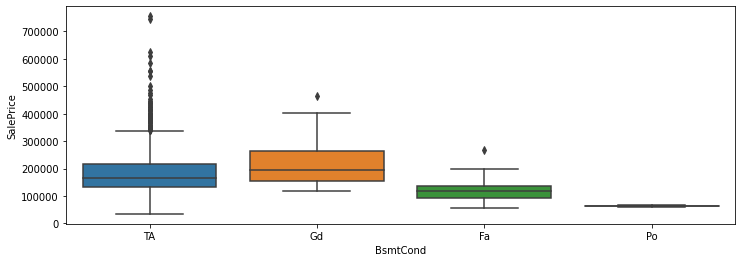

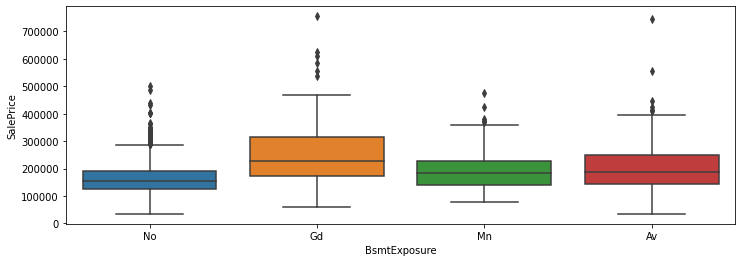

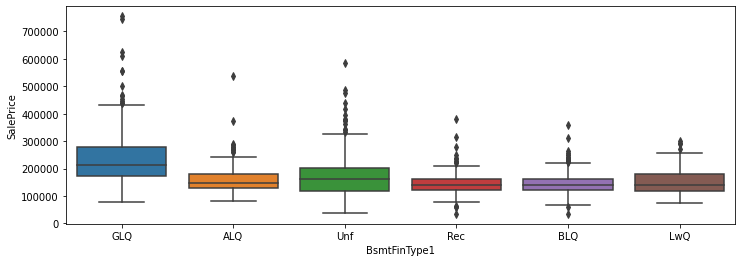

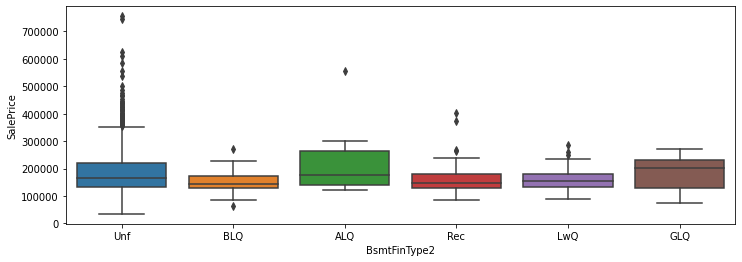

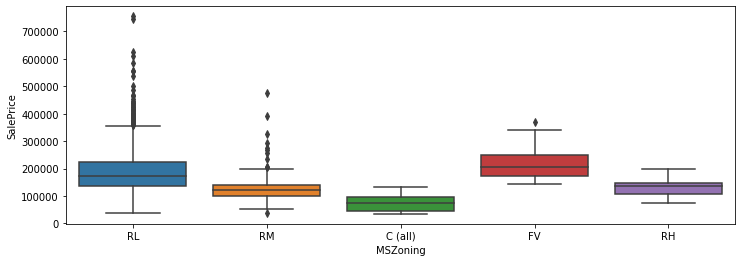

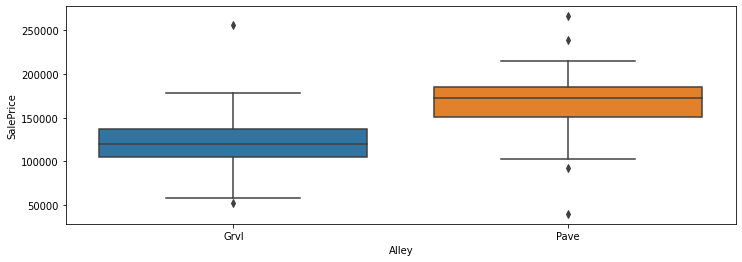

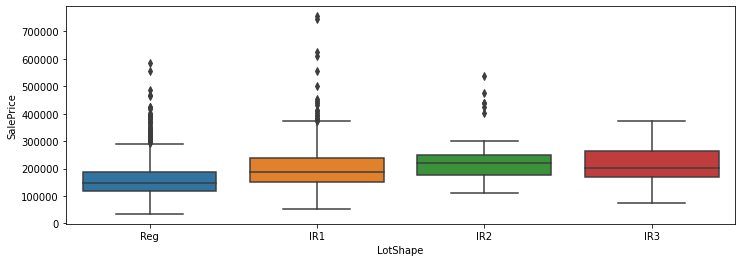

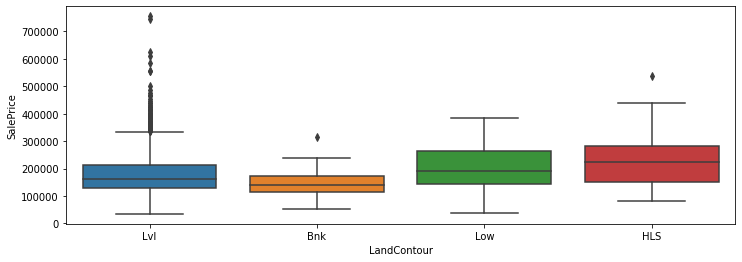

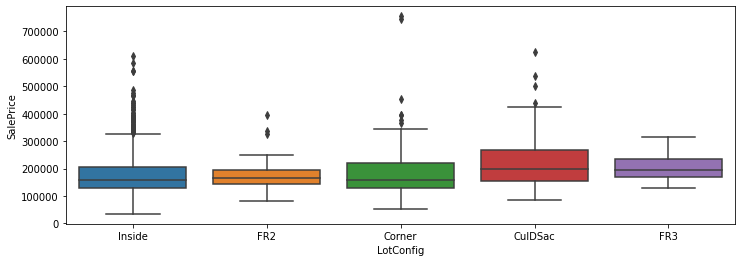

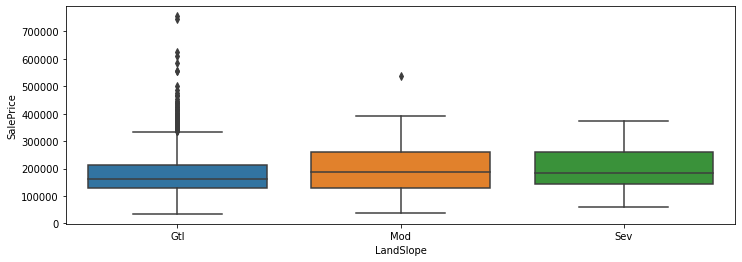

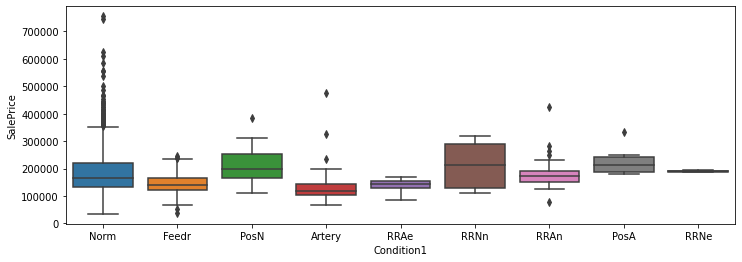

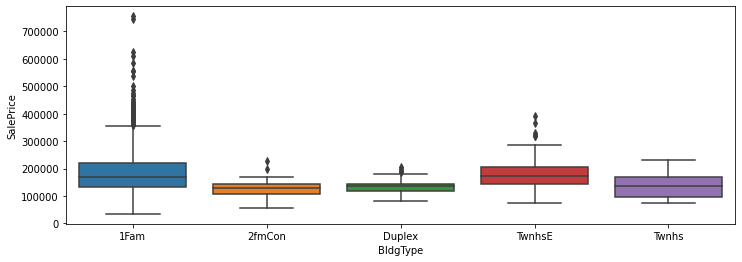

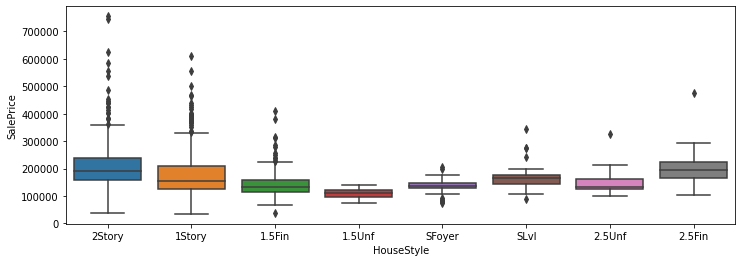

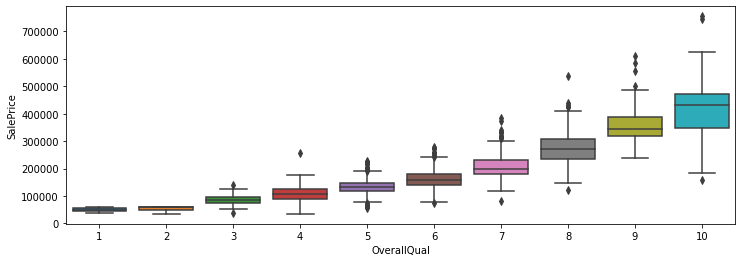

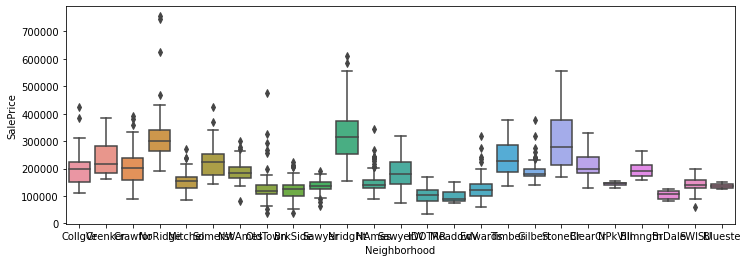

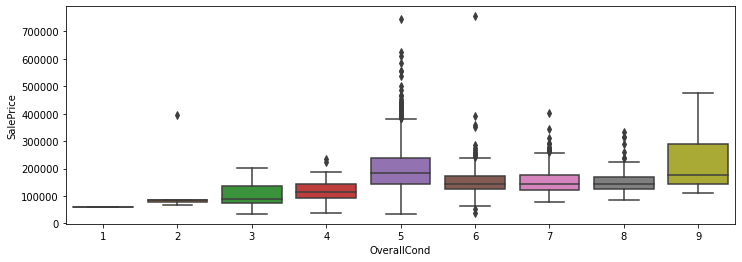

In [11]:
for feature in dataset[categorical_features] :
    plt.figure(figsize=(12,4))
    sns.boxplot(x=feature,y='SalePrice',data=dataset)
    plt.show()

In [6]:
try:
    from pyspark import SparkContext, SparkConf
    from pyspark.sql import SparkSession
except ImportError as e:
    printmd('<<<<<!!!!! Please restart your kernel after installing Apache Spark !!!!!>>>>>')

In [24]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()

In [40]:
train = spark.read.option("header", "true").option("delimiter", ",").csv(cwd + "\\work.csv")
train.createOrReplaceTempView('train')

test = spark.read.option("header", "true").option("delimiter", ",").csv(cwd + "\\submission.csv")
test.createOrReplaceTempView('test')

In [41]:
spark.sql("SELECT Id, LotFrontage FROM train where LotFrontage = 'NA' limit 5").show()

+---+-----------+
| Id|LotFrontage|
+---+-----------+
|  8|         NA|
| 13|         NA|
| 15|         NA|
| 17|         NA|
| 25|         NA|
+---+-----------+



In [42]:
spark.sql("SELECT Id, Alley FROM train where Id = 210").show()

+---+-----+
| Id|Alley|
+---+-----+
|210|   NA|
+---+-----+



In [43]:

spark.sql("SELECT Id, BsmtFinSF1 FROM test where BsmtFinSF1 = 'NA'").show()

+----+----------+
|  Id|BsmtFinSF1|
+----+----------+
|2121|        NA|
+----+----------+



In [46]:
spark.sql("SELECT Id,  GarageYrBlt, GarageArea, GarageCars FROM train where GarageYrBlt = 'NA'").show()

+---+-----------+----------+----------+
| Id|GarageYrBlt|GarageArea|GarageCars|
+---+-----------+----------+----------+
| 40|         NA|         0|         0|
| 49|         NA|         0|         0|
| 79|         NA|         0|         0|
| 89|         NA|         0|         0|
| 90|         NA|         0|         0|
|100|         NA|         0|         0|
|109|         NA|         0|         0|
|126|         NA|         0|         0|
|128|         NA|         0|         0|
|141|         NA|         0|         0|
|149|         NA|         0|         0|
|156|         NA|         0|         0|
|164|         NA|         0|         0|
|166|         NA|         0|         0|
|199|         NA|         0|         0|
|211|         NA|         0|         0|
|242|         NA|         0|         0|
|251|         NA|         0|         0|
|288|         NA|         0|         0|
|292|         NA|         0|         0|
+---+-----------+----------+----------+
only showing top 20 rows

